In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# 1. Indlæs CSV-fil
file_path = "Uge14Data.csv"
df = pd.read_csv(file_path)

# 2. Undersøg data
print("Raw data:")
print(df.head())  # Se de første rækker
print(df.info())  # Se datatype og manglende værdier

# 3. Definér features (X) og target (y)




Raw data:
   Age  Income
0   27   70000
1   29   90000
2   29   61000
3   28   60000
4   42  150000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     23 non-null     int64
 1   Income  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes
None


In [80]:
scaler = MinMaxScaler()
print(scaler.fit(df))

X = scaler.transform(df)


MinMaxScaler()


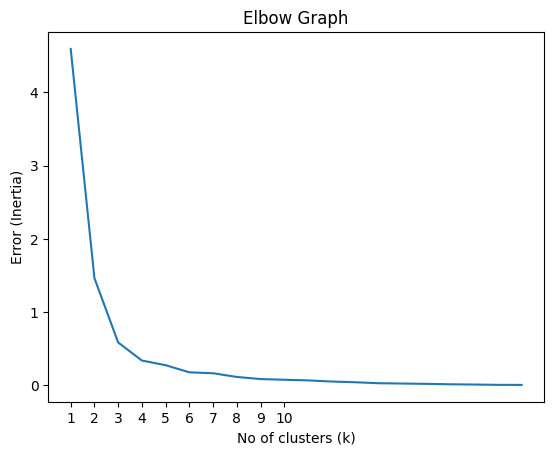

In [81]:
error = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i).fit(X)
    error.append(kmeans.inertia_)


plt.plot(range(1,21), error)
plt.title("Elbow Graph")
plt.xlabel("No of clusters (k)")
plt.ylabel("Error (Inertia)")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.show()

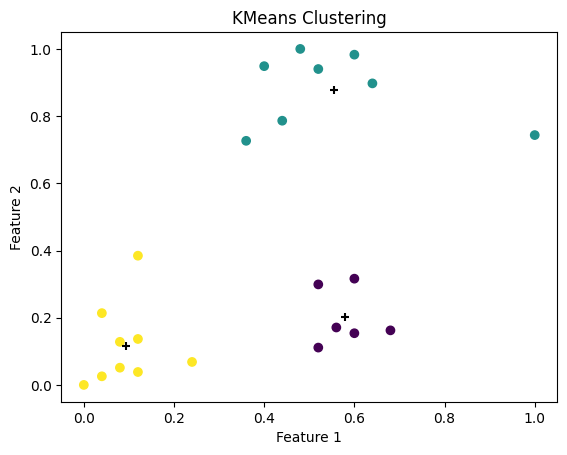

In [82]:
kmeans = KMeans(n_clusters=3)  # Definér KMeans med 3 clusters
y = kmeans.fit_predict(X)  # Fit modellen til data

plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
c='black', marker='+')
plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Image Segmentation

In [83]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

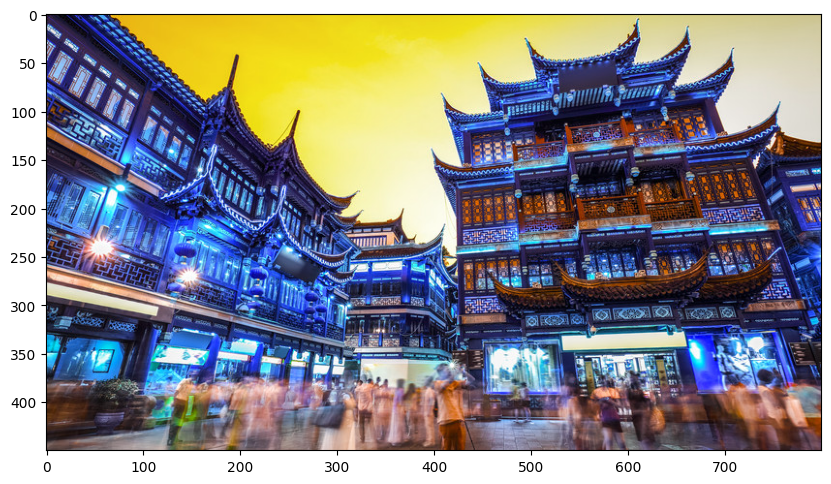

In [84]:
original_image = cv2.imread("china_shanghai_yuyuan-garden-city.jpg")
plt.figure(figsize=(10,10))
plt.imshow(original_image)

In [86]:
# 4. Forbehandling af billeddata
image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [98]:
K=3
_, labels, (centers) = cv2.kmeans(pixel_values, K, None, criteria, 10,
cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
labels = labels.flatten()



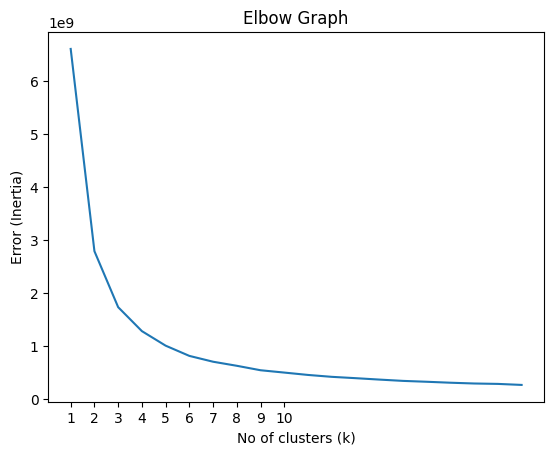

In [103]:
error = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i).fit(pixel_values)
    error.append(kmeans.inertia_)


plt.plot(range(1,21), error)
plt.title("Elbow Graph")
plt.xlabel("No of clusters (k)")
plt.ylabel("Error (Inertia)")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.show()

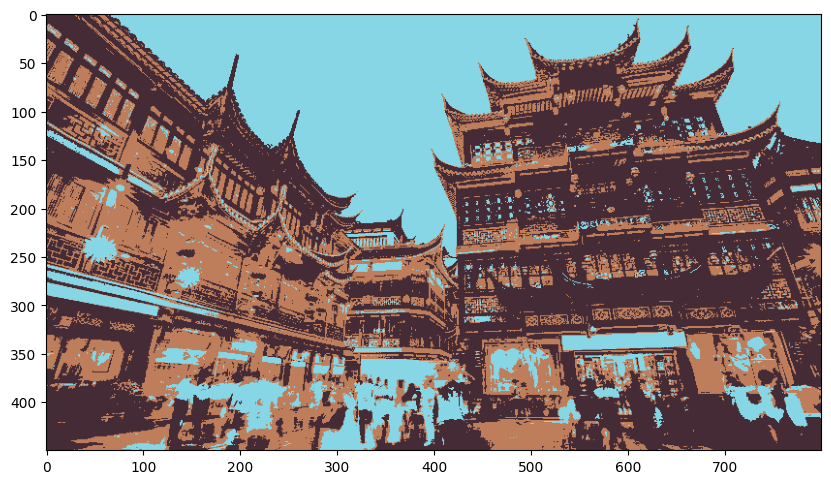

In [99]:

segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)
plt.figure(figsize=(10,10))
plt.imshow(segmented_image)

